In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2020-01-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2020_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-01-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7766,사상구,10425,사상구,2659,34.24%,"9,096"
1,2020-01-09,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2020-01-09,갈치,60cm정도 500g 1마리(냉동),8000,사상구,8500,사상구,500,6.25%,"8,250"
3,2020-01-09,고등어,30㎝정도 500g 1마리,4154,사상구,6218,사상구,2064,49.69%,"5,186"
4,2020-01-09,달걀,오경슈퍼란60g정도 10개,2890,사상구,2920,사상구,30,1.04%,"2,905"
5,2020-01-09,닭고기,육계 1.0㎏,7990,사상구,8880,사상구,890,11.14%,"8,435"
6,2020-01-09,대파,1.0㎏,3225,사상구,3490,사상구,265,8.22%,"3,358"
7,2020-01-09,돼지고기,삼겹살 500g,7450,사상구,8400,사상구,950,12.75%,"7,925"
8,2020-01-09,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4531,사상구,116,2.63%,"4,473"
9,2020-01-09,라면,신라면 120g 1봉지,676,사상구,3380,사상구,2704,400.0%,"2,028"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2020-04-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2020_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-04-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5175,사상구,12675,사상구,7500,144.93%,"8,925"
1,2020-04-09,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2020-04-09,갈치,60cm정도 500g 1마리(냉동),8214,사상구,9860,사상구,1646,20.04%,"9,037"
3,2020-04-09,고등어,30㎝정도 500g 1마리,4987,사상구,5000,사상구,13,0.26%,"4,994"
4,2020-04-09,달걀,오경슈퍼란60g정도 10개,2980,사상구,3290,사상구,310,10.4%,"3,135"
5,2020-04-09,닭고기,육계 1.0㎏,7880,사상구,9990,사상구,2110,26.78%,"8,935"
6,2020-04-09,대파,1.0㎏,1850,사상구,2490,사상구,640,34.59%,"2,170"
7,2020-04-09,돼지고기,삼겹살 500g,7250,사상구,9950,사상구,2700,37.24%,"8,600"
8,2020-04-09,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4531,사상구,116,2.63%,"4,473"
9,2020-04-09,라면,신라면 120g 1봉지,676,사상구,3380,사상구,2704,400.0%,"2,028"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2020-07-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2020_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-07-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5175,사상구,11925,사상구,6750,130.43%,"8,550"
1,2020-07-09,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2020-07-09,갈치,60cm정도 500g 1마리(냉동),8214,사상구,14800,사상구,6586,80.18%,"11,507"
3,2020-07-09,고등어,30㎝정도 500g 1마리,4987,사상구,5187,사상구,200,4.01%,"5,087"
4,2020-07-09,달걀,오경슈퍼란60g정도 10개,2980,사상구,3290,사상구,310,10.4%,"3,135"
5,2020-07-09,닭고기,육계 1.0㎏,8990,사상구,10980,사상구,1990,22.14%,"9,985"
6,2020-07-09,대파,1.0㎏,3240,사상구,3490,사상구,250,7.72%,"3,365"
7,2020-07-09,돼지고기,삼겹살 500g,9950,사상구,10900,사상구,950,9.55%,"10,425"
8,2020-07-09,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4531,사상구,116,2.63%,"4,473"
9,2020-07-09,라면,신라면 120g 1봉지,676,사상구,3380,사상구,2704,400.0%,"2,028"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2020-10-15"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2020_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-10-15,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5175,사상구,11925,사상구,6750,130.43%,"8,550"
1,2020-10-15,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2020-10-15,갈치,60cm정도 500g 1마리(냉동),8500,사상구,13300,사상구,4800,56.47%,"10,900"
3,2020-10-15,고등어,30㎝정도 500g 1마리,4966,사상구,5345,사상구,379,7.63%,"5,156"
4,2020-10-15,달걀,오경슈퍼란60g정도 10개,2980,사상구,3290,사상구,310,10.4%,"3,135"
5,2020-10-15,닭고기,육계 1.0㎏,8990,사상구,9680,사상구,690,7.68%,"9,335"
6,2020-10-15,대파,1.0㎏,3490,사상구,4975,사상구,1485,42.55%,"4,233"
7,2020-10-15,돼지고기,삼겹살 500g,10900,사상구,11950,사상구,1050,9.63%,"11,425"
8,2020-10-15,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4531,사상구,116,2.63%,"4,473"
9,2020-10-15,라면,신라면 120g 1봉지,676,사상구,3380,사상구,2704,400.0%,"2,028"


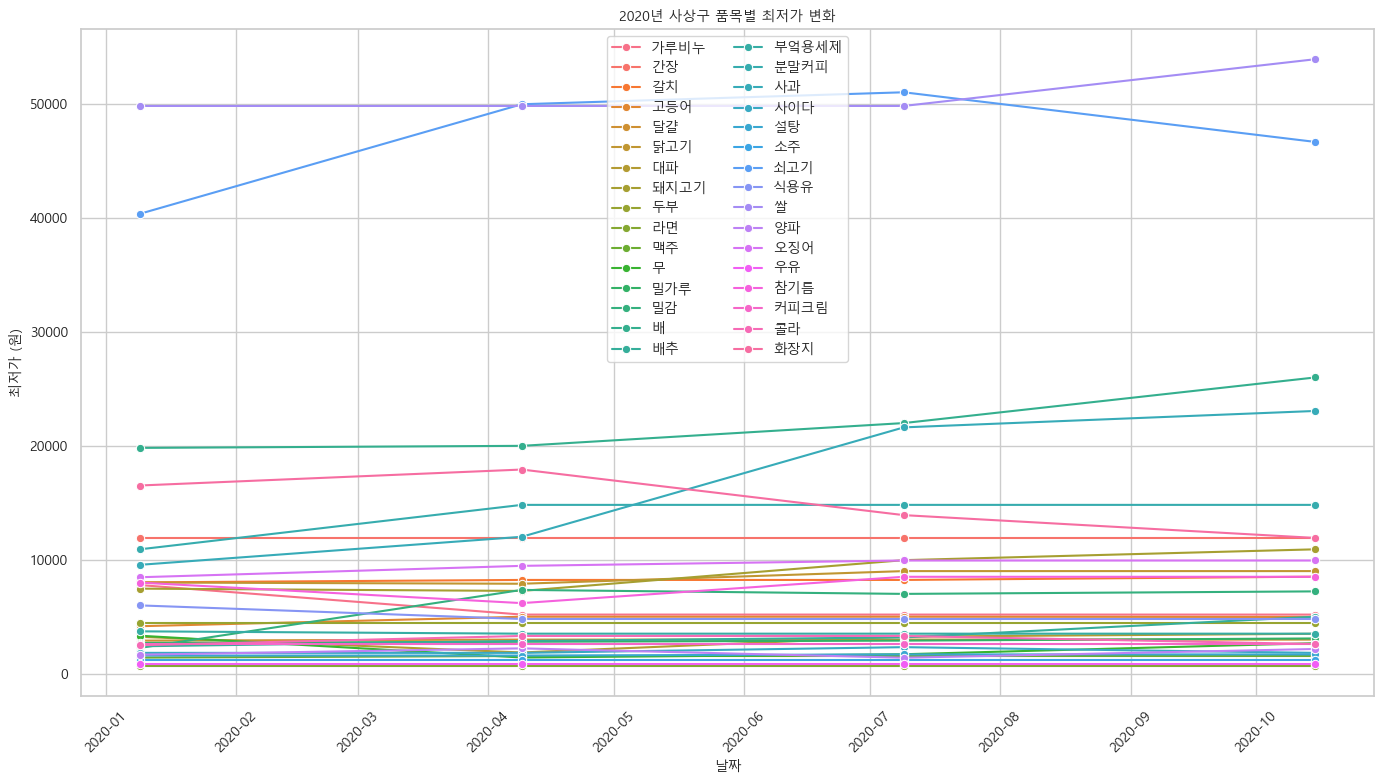

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2020_1q.csv")
q2 = pd.read_csv("사상구2020_2q.csv")
q3 = pd.read_csv("사상구2020_3q.csv")
q4 = pd.read_csv("사상구2020_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2020년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2020_min.csv", index=False, encoding="utf-8-sig")

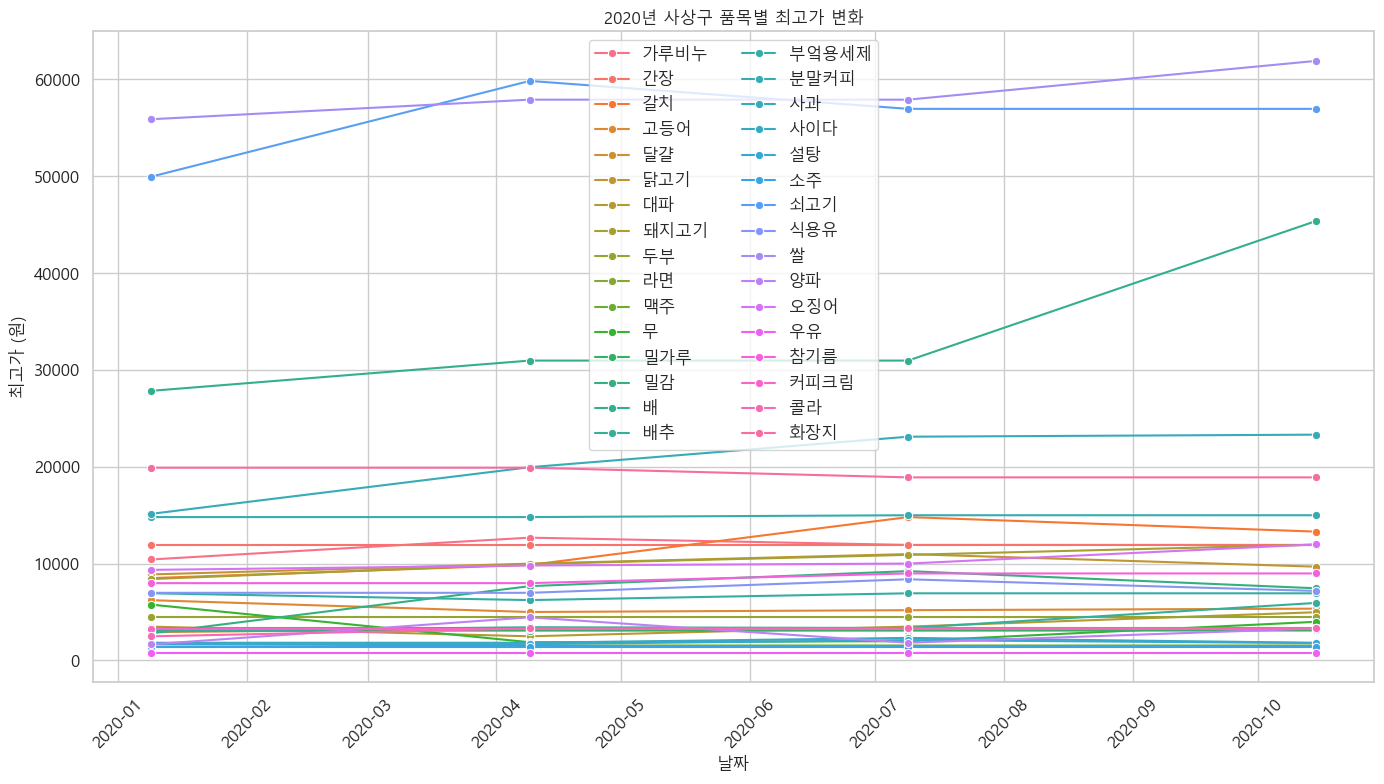

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2020_1q.csv")
q2 = pd.read_csv("사상구2020_2q.csv")
q3 = pd.read_csv("사상구2020_3q.csv")
q4 = pd.read_csv("사상구2020_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2020년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2020_max.csv", index=False, encoding="utf-8-sig")